# 说明---三个有效秩

为了更好的反应不同的scale对应的有效秩的大小和变化情况,希望可以在每一个scale下多做几次计算,这样的话,可以通过取平均等方法消除不确定的噪音

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# 首先加载自己的支持函数
from support_code.get_rank_cpu_0904 import get_Effective_Ranks, Effective_Ranks
from support_code.load_dataset import get_data_loader
from support_code.MLP import MLP
from support_code.scale_ranks import get_rank
# 然后加载其他可能需要的库
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import CIFAR10
import numpy as np
import os
# 指定存储图像的目录
output_dir = 'Ranks'

# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [3]:
import pandas as pd

# ------------------------------------训练开始前的基本设置---------------------------------------------------
# 设置设备
device_cuda = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 创建一个全零的(9, 3, 5)张量
result_tensor = torch.zeros((10, 20, 4), dtype=torch.float32)
# ---------------------------------- 设置结束----------------------------------------------------------------------------------
# 第一个维度
scales = [i / 10.0 for i in range(1, result_tensor.shape[0]+1)]
i = 0

# 创建三维DataFrame
for scale in scales:
    print("--------------------开始scale={}的情况---------------------".format(scale), "\n")
    train_loader, test_loader = get_data_loader(scale)
    print("首先得到了有效秩的情况 \n")
    for j in range(result_tensor.shape[1]):
        # 假设get_rank返回的4个数字是[rk_max_index,rk_max_value, Rk_value_max_rk_index, rk[0]]
        num1, num2, num3, num4 = get_rank(scale=scale, device=device_cuda, train_loader=train_loader)

        # 使用索引将这4个数字填充到张量的第三个维度
        result_tensor[i, j, :] = torch.tensor([num1, num2, num3, num4], dtype=torch.float32)
    i += 1

print(result_tensor)


--------------------开始scale=0.1的情况--------------------- 



100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.2的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.3的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.4的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.5的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.6的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.7的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------

Combined plot saved as 'Ranks\ranks单独.png'


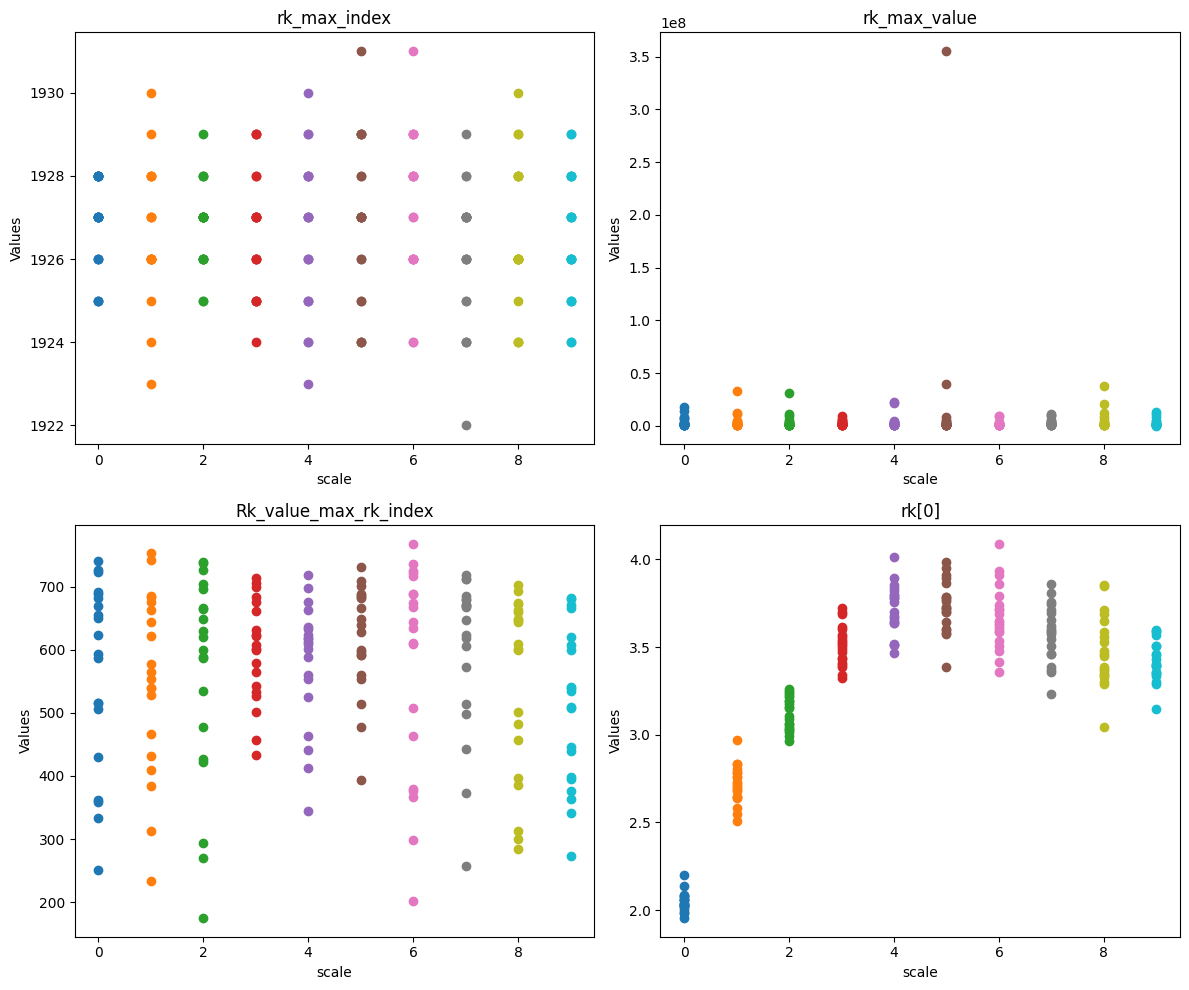

In [4]:
# 假设 result_tensor 已经创建，形状为 (9, 3, 4)

# 获取 result_tensor 中的数据
data = result_tensor.numpy()  # 转换为 NumPy 数组

# 创建一个列表来保存不同类型的点的标签
legend_labels = ['rk_max_index', 'rk_max_value', 'Rk_value_max_rk_index', 'rk[0]']

# 创建一个颜色和形状的列表以区分不同的点
colors = ['b', 'g', 'r', 'c']  # 不同颜色
markers = ['o', 's', 'D', '^']  # 不同形状

# 创建一个图形，分为4个子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 针对每种数据类型创建子图
for i in range(result_tensor.shape[2]):
    ax = axes[i // 2, i % 2]  # 获取当前子图
    ax.set_title(legend_labels[i])  # 子图标题
    for j in range(result_tensor.shape[0]):
        x = [j] * result_tensor.shape[1]  # 同一横坐标位置
        y = data[j, :, i]  # 不同数据点的值
        ax.scatter(x, y)

    # 添加图例
    # ax.legend()

# 设置横坐标和纵坐标标签
for ax in axes.flat:
    ax.set(xlabel='scale', ylabel='Values')

# 调整子图布局
plt.tight_layout()
# 保存整个大图
output_filename = os.path.join(output_dir, "ranks单独.png")
plt.savefig(output_filename)
print(f"Combined plot saved as '{output_filename}'")

# 显示图形
plt.show()


Combined plot saved as 'Ranks\ranks平均.png'


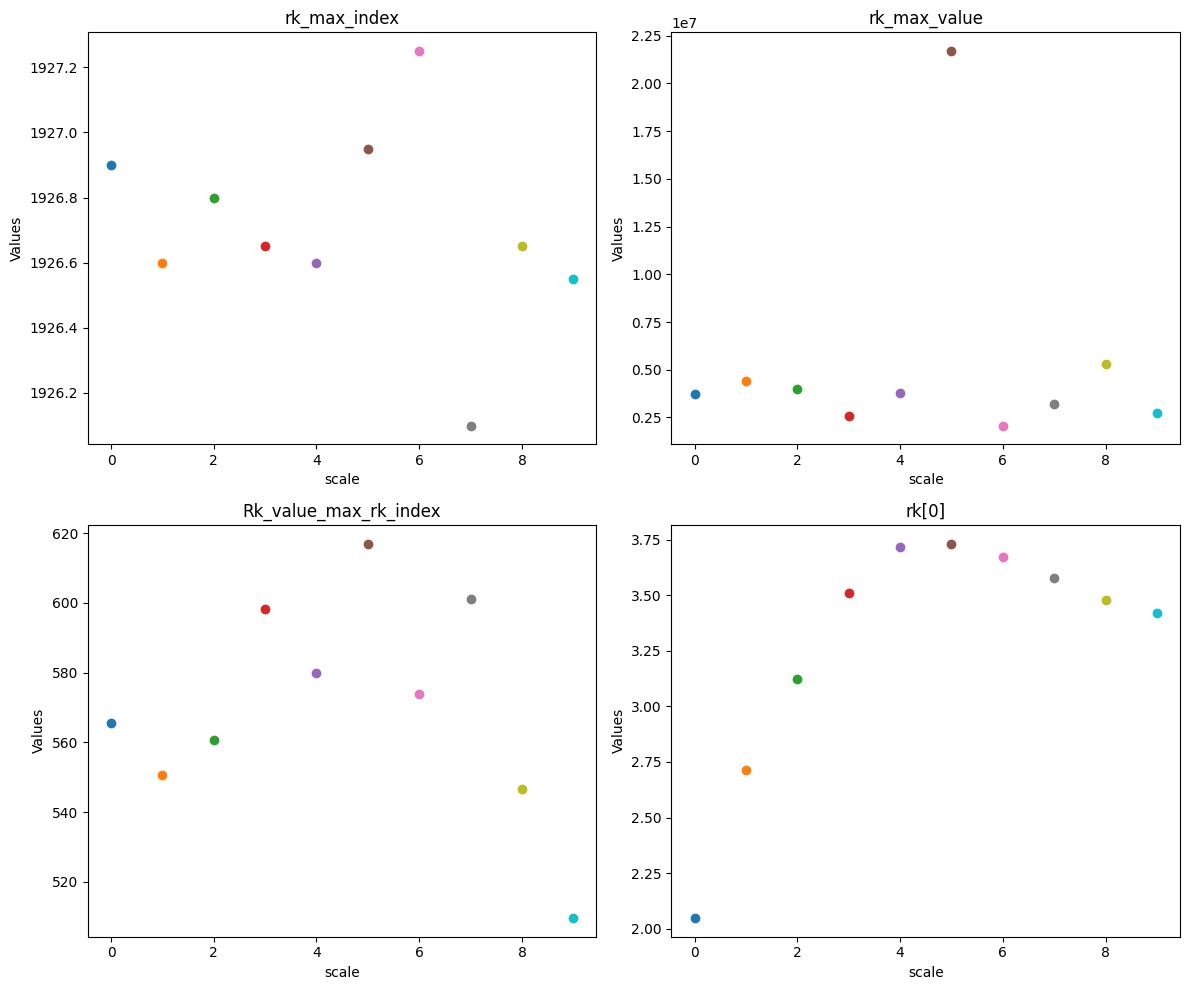

In [5]:
# 假设 result_tensor 已经创建，形状为 (9, 3, 4)

# 获取 result_tensor 中的数据
data = result_tensor.numpy()  # 转换为 NumPy 数组

# 创建一个列表来保存不同类型的点的标签
legend_labels = ['rk_max_index', 'rk_max_value', 'Rk_value_max_rk_index', 'rk[0]']

# 创建一个颜色和形状的列表以区分不同的点
colors = ['b', 'g', 'r', 'c']  # 不同颜色
markers = ['o', 's', 'D', '^']  # 不同形状

# 创建一个图形，分为4个子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 针对每种数据类型创建子图
for i in range(result_tensor.shape[2]):
    ax = axes[i // 2, i % 2]  # 获取当前子图
    ax.set_title(legend_labels[i])  # 子图标题
    for j in range(result_tensor.shape[0]):
        x = [j]   # 同一横坐标位置
        y = data[j, :, i].mean()  # 不同数据点的值
        ax.scatter(x, y)

    # 添加图例
    # ax.legend()

# 设置横坐标和纵坐标标签
for ax in axes.flat:
    ax.set(xlabel='scale', ylabel='Values')

# 调整子图布局
plt.tight_layout()
# 保存整个大图
output_filename = os.path.join(output_dir, "ranks平均.png")
plt.savefig(output_filename)
print(f"Combined plot saved as '{output_filename}'")

# 显示图形
plt.show()


Combined plot with error bars saved as 'Ranks\ranks_with_error_bars.png'


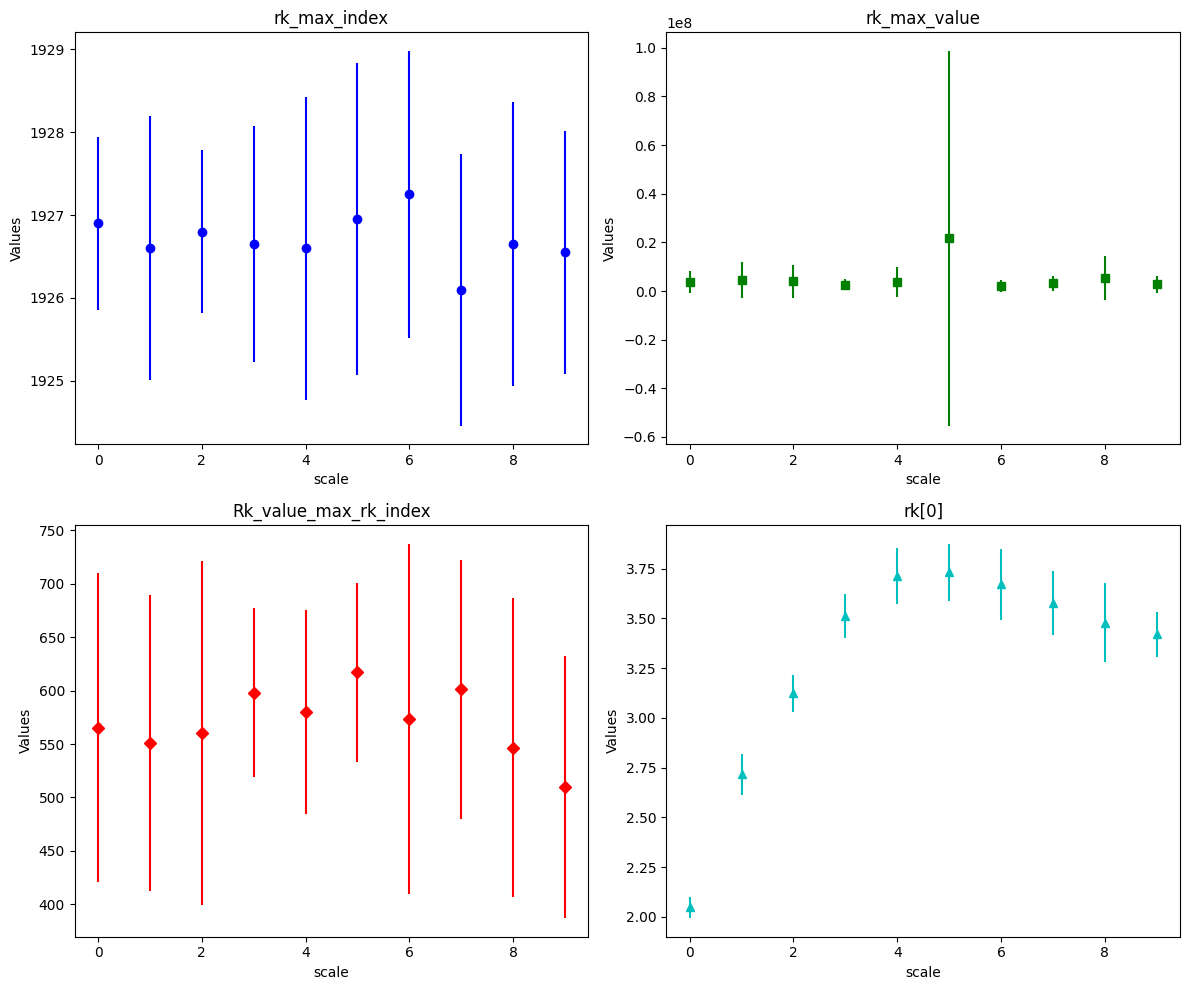

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 result_tensor 已经创建，形状为 (9, 3, 4)
# 获取 result_tensor 中的数据
data = result_tensor.numpy()  # 转换为 NumPy 数组

# 创建一个列表来保存不同类型的点的标签
legend_labels = ['rk_max_index', 'rk_max_value', 'Rk_value_max_rk_index', 'rk[0]']

# 创建一个颜色和形状的列表以区分不同的点
colors = ['b', 'g', 'r', 'c']  # 不同颜色
markers = ['o', 's', 'D', '^']  # 不同形状

# 创建一个图形，分为4个子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 针对每种数据类型创建子图
for i in range(result_tensor.shape[2]):
    ax = axes[i // 2, i % 2]  # 获取当前子图
    ax.set_title(legend_labels[i])  # 子图标题
    for j in range(result_tensor.shape[0]):
        x = j  # 横坐标位置
        y = data[j, :, i]  # 不同数据点的值
        mean_y = np.mean(y)  # 计算平均值
        std_y = np.std(y)  # 计算标准差
        ax.errorbar(x, mean_y, yerr=std_y, fmt=colors[i]+markers[i])

    # 添加图例
    # ax.legend()

# 设置横坐标和纵坐标标签
for ax in axes.flat:
    ax.set(xlabel='scale', ylabel='Values')

# 调整子图布局
plt.tight_layout()
# 保存整个大图
output_filename = os.path.join(output_dir, "ranks_with_error_bars.png")
plt.savefig(output_filename)
print(f"Combined plot with error bars saved as '{output_filename}'")

# 显示图形
plt.show()
